In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import corner

In [2]:
target_dict={90:'SNIa',67:'SNIa-91bg',
             52:'SNIax',42:'SNII',
             62:'SNIbc',95:'SLSN-I',
             15:'TDE',64:'KN',
             88:'AGN',92:'RRL',
             65:'M-dwarf',16:'EB',
             53:'Mira',6:'Lens-Single',
             994:'PISN', 999:'UNKNOWN', 1:'NON PISN'}
passband_list = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}

## Polynomial model

In [3]:
cols = ['A','B','C','err','points','max_flux','nb_DB']
nb_extra = 0   #Number of extra parameter that you dont want to plot
nb_band = 4

sample = 'Iron'
curve = 'Half/'
additional = '4p/'
PISN_split = '-2_'
model = 'poly'
purpose = 'test'
file = 'FUSED'
extras = ''


In [7]:
path="../../plasticc/param_table/"+sample+"/"+curve+additional+purpose+PISN_split+model+extras+file+".pkl"
data=pd.read_pickle(path)
nb_param = len(cols)
anomaly = 994
data

,object_id,target,0,1,2,3,4,5,6,7,...,18,19,20,21,22,23,24,25,26,27
0,659305132,90,0.000033,-0.013681,0.833114,5.896856e-02,7.0,104.245506,2.0,0.000036,...,11.0,51.271599,0.0,0.000015,-0.007324,0.809187,3.073589e-01,10.0,119.119354,0.0
1,659306132,42,0.000022,-0.006695,0.494169,3.067180e-01,11.0,221.913025,2.0,-0.000004,...,10.0,200.145630,3.0,-0.000020,0.001795,0.357665,6.144198e-01,9.0,158.342087,0.0
2,659308012,95,-0.000025,0.007476,0.387246,1.375492e-01,10.0,62.889927,3.0,-0.000011,...,15.0,99.109711,0.0,-0.000004,0.002916,0.100925,6.727887e-01,12.0,117.513481,0.0
3,659311302,90,-0.000006,0.001921,0.087604,3.977721e-01,10.0,230.585190,3.0,-0.000197,...,4.0,103.894737,1.0,-0.000282,0.006604,1.000000,3.422564e-25,3.0,157.002869,0.0
4,659313162,42,-0.000046,0.017320,-0.276079,2.901151e-01,7.0,121.452477,3.0,-0.000147,...,9.0,116.665039,4.0,-0.000071,0.017039,-0.253685,5.894159e-01,12.0,157.896744,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88540,139523062,90,-0.000029,0.010755,-0.085481,2.328476e-01,8.0,96.376396,3.0,0.000014,...,9.0,77.906746,0.0,0.000094,-0.022087,0.030714,9.035197e-02,6.0,102.774063,0.0
88541,139523141,42,-0.000031,0.008630,0.140333,2.969953e-01,9.0,24.770012,3.0,-0.000233,...,10.0,16.930536,0.0,-0.000006,0.004934,-0.611465,1.114840e+00,10.0,55.082615,0.0
88542,139523381,90,0.000177,-0.024206,1.000000,2.514406e-10,3.0,438.865875,3.0,0.000099,...,9.0,675.794312,6.0,-0.000007,0.001408,0.244143,3.198054e-01,7.0,844.464539,3.0
88543,139524102,42,-0.000024,0.007741,0.041052,5.208981e-01,9.0,49.989586,3.0,-0.000046,...,9.0,64.703384,0.0,-0.000209,0.026543,-0.214208,2.488121e-01,5.0,82.126251,0.0


In [8]:
def get_table(band,bi=True,target=anomaly):

    band -= 2
    if bi == True:
        data.loc[data['target']!=target,'target']=1#BINARY

    param_table_other = pd.DataFrame()
    param_table_PISN = pd.DataFrame()

    for k in range(len(cols)) :

        table_single = pd.DataFrame(data={cols[k] : []})

        pos = band*(nb_param+nb_extra)+k
        table = data[data['target']!=target].loc[:,[pos]].rename(columns={pos: cols[k]})
        table_single = table_single.append(table,ignore_index=True)

        param_table_other = pd.concat([param_table_other,table_single],axis=1)


    for k in range(len(cols)) :

        table_single = pd.DataFrame(data={cols[k] : []})

        pos = band*(nb_param+nb_extra)+k
        table = data[data['target']==target].loc[:,[pos]].rename(columns={pos: cols[k]})
        table_single = table_single.append(table,ignore_index=True)

        param_table_PISN = pd.concat([param_table_PISN,table_single],axis=1)
        
    return param_table_PISN,param_table_other

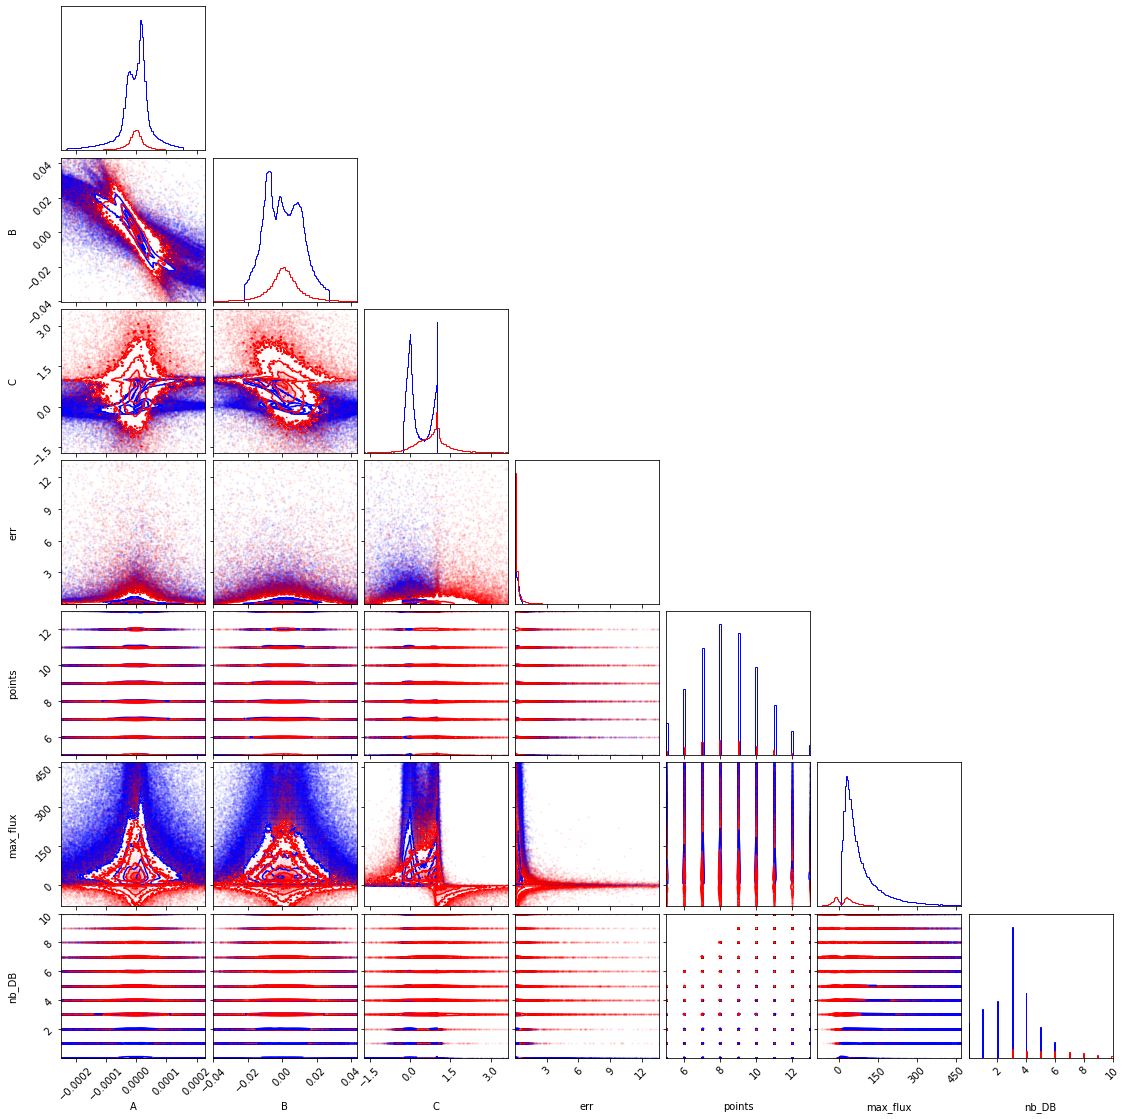

In [9]:
zoom_global = 0.92
zoom = [zoom_global]*len(cols)
band = 2

PISN = get_table(band,target=anomaly )[0]
other = get_table(band,target=anomaly )[1]

figure = corner.corner(other, bins=100,range=zoom,color='blue',labels=cols,s=0.2,smooth=0) 
figure = corner.corner(PISN,fig=figure,color='red',bins=100,s=1,range=zoom,smooth=0)


#plt.savefig("AGNcorner_6p_HalfIron-2_b5.png")